# **T&T LAB ASSIGNMENT 10**  
**Name: Shidhu Bhadra  
Roll: 1905348  
Date: 09/03/2022**

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## **1. On ‘Income dataset’**

In [2]:
df_main = pd.read_csv("income.csv")

In [3]:
df_main.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
df = df_main.copy()

In [5]:
df.isnull().mean().round(5).mul(100).sort_values(ascending=False)

age              0.0
JobType          0.0
EdType           0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
gender           0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
nativecountry    0.0
SalStat          0.0
dtype: float64

In [6]:
df.drop(columns=['relationship','capitalgain', 'capitalloss'], inplace=True)

In [7]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,White,Female,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,White,Male,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,White,Male,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,White,Male,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,White,Male,35,United-States,"less than or equal to 50,000"


In [8]:
cols = ['JobType', 'EdType', 'maritalstatus', 'occupation', 'race', 
        'gender', 'nativecountry', 'SalStat']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry,SalStat
0,45,4,11,0,1,4,0,28,38,1
1,24,1,11,4,2,4,1,40,38,1
2,44,4,15,2,10,4,1,40,38,0
3,27,4,6,4,3,4,1,40,25,1
4,20,4,15,4,12,4,1,35,38,1


In [10]:
df.SalStat.value_counts()

1    24283
0     7695
Name: SalStat, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['SalStat']), df['SalStat'], train_size = 0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25582, 9), (25582,), (6396, 9), (6396,))

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

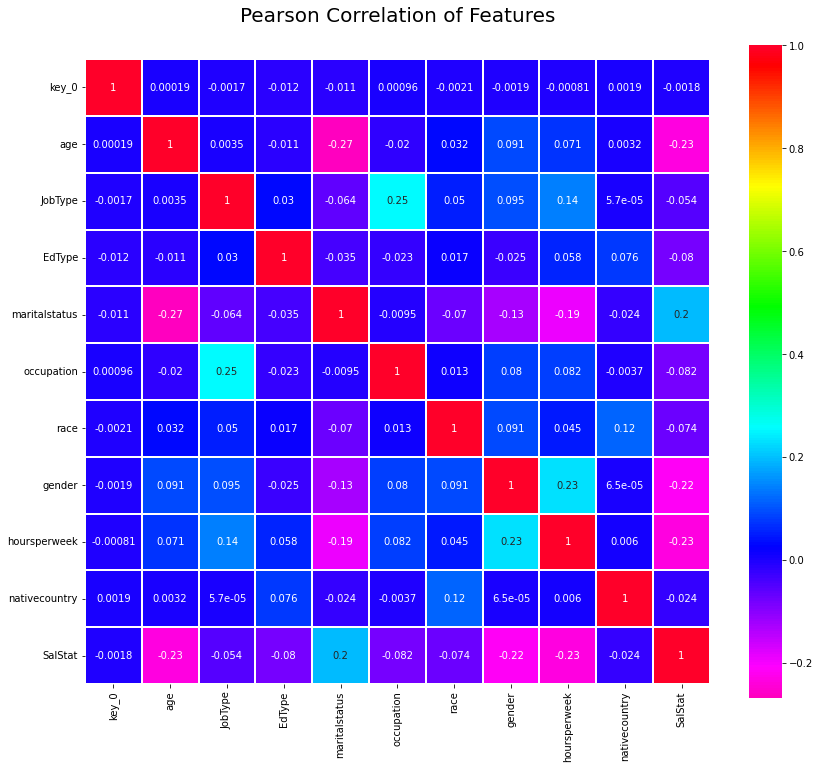

In [12]:
colormap = plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
         square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [13]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []

## **A) Apply Support vector machine algorithm and find out the accuarcy in predicting whether the salary status is less than or equal to 5000 or it is greater than 50000.**

i) **Confusion Matrix  
i) Accuracy score  
iii)recall, precision, f- score**

In [14]:
SVReg = SVC()
SVReg.fit(x_train, y_train)
y_pred = SVReg.predict(x_test)

print("Support Vector Regressor")
print(confusion_matrix(y_test, y_pred), '\n\n')
accLogReg = accuracy_score(y_test, y_pred) * 100
recLogReg = recall_score(y_test, y_pred) * 100
preLogReg = precision_score(y_test, y_pred) * 100
f1sLogReg = f1_score(y_test, y_pred) * 100
print('Accuracy:', accLogReg)
print('Recall:', recLogReg)
print('Precision:', preLogReg)
print('F score:', f1sLogReg)

algos.append("Support Vector Machine")
accuracy.append(accLogReg)
recall.append(recLogReg)
precision.append(preLogReg)
f1Score.append(f1sLogReg)

Support Vector Regressor
[[   0 1556]
 [   0 4840]] 


Accuracy: 75.6722951844903
Recall: 100.0
Precision: 75.6722951844903
F score: 86.15165539337842


## **B) Apply Gradient Boost algorithm and find out the accuarcy in predicting whether the salary status is less than or equal to 5000 or it is greater than 50000.**

I) **Confusion Matrix  
ii)Accuracy score  
iii)recall, precision, f- score**

In [15]:
GBRegressor = GradientBoostingClassifier()
GBRegressor.fit(x_train, y_train)
y_pred = GBRegressor.predict(x_test)

print("Gradient Boost Algorithm")
print(confusion_matrix(y_test, y_pred), '\n\n')
accLogReg = accuracy_score(y_test, y_pred) * 100
recLogReg = recall_score(y_test, y_pred) * 100
preLogReg = precision_score(y_test, y_pred) * 100
f1sLogReg = f1_score(y_test, y_pred) * 100
print('Accuracy:', accLogReg)
print('Recall:', recLogReg)
print('Precision:', preLogReg)
print('F score:', f1sLogReg)

algos.append("Gradient Boost Algorithm")
accuracy.append(accLogReg)
recall.append(recLogReg)
precision.append(preLogReg)
f1Score.append(f1sLogReg)

Gradient Boost Algorithm
[[ 827  729]
 [ 328 4512]] 


Accuracy: 83.47404627892433
Recall: 93.22314049586777
Precision: 86.090440755581
F score: 89.51492907449659


## **C) Apply Gradient Boost algorithm and find out the accuarcy in predicting whether the salary status is less than or equal to 5000 or it is greater than 50000.** 

I)**Confusion Matrix  
ii)Accuracy score  
iii)recall, precision, f- score**

In [16]:
ADABooster = AdaBoostClassifier()
ADABooster.fit(x_train, y_train)
y_pred = ADABooster.predict(x_test)

print("ADBoost Algorithm")
print(confusion_matrix(y_test, y_pred), '\n\n')
accLogReg = accuracy_score(y_test, y_pred) * 100
recLogReg = recall_score(y_test, y_pred) * 100
preLogReg = precision_score(y_test, y_pred) * 100
f1sLogReg = f1_score(y_test, y_pred) * 100
print('Accuracy:', accLogReg)
print('Recall:', recLogReg)
print('Precision:', preLogReg)
print('F score:', f1sLogReg)

algos.append("AdaBoost Algorithm")
accuracy.append(accLogReg)
recall.append(recLogReg)
precision.append(preLogReg)
f1Score.append(f1sLogReg)

ADBoost Algorithm
[[ 841  715]
 [ 393 4447]] 


Accuracy: 82.67667292057536
Recall: 91.8801652892562
Precision: 86.14877954281286
F score: 88.92221555688862


In [17]:
algoTable = pd.DataFrame(list(zip(algos, accuracy, recall, precision, f1Score)), columns=["Algorithms", "Accuracy", "Recall", "Precision", "F1 Score"])
algoTable

,Algorithms,Accuracy,Recall,Precision,F1 Score
0,Support Vector Machine,75.672295,100.000000,75.672295,86.151655
1,Gradient Boost Algorithm,83.474046,93.223140,86.090441,89.514929
2,AdaBoost Algorithm,82.676673,91.880165,86.148780,88.922216


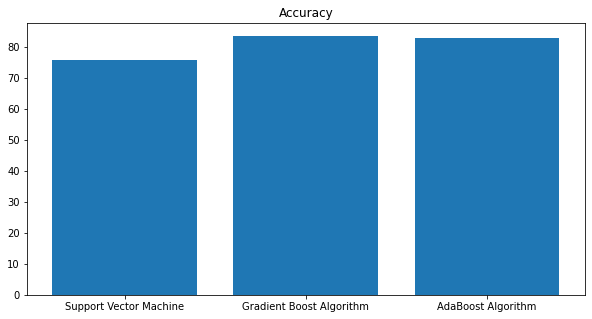

In [18]:
plt.figure(figsize=(10, 5))
plt.bar(algos, accuracy)
plt.title("Accuracy")
plt.show()